In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer

In [3]:
data=pd.read_csv("../data/Carac_Stars.csv",sep=",")
data.head()

,Kepler_ID,Metalicidad,Clasificacion,incert_clas
0,10797460,0.136,CANDIDATE,1.000
1,10811496,-0.127,FALSE POSITIVE,0.000
2,10848459,-0.522,FALSE POSITIVE,0.000
3,10854555,0.081,CANDIDATE,1.000
4,10872983,-0.067,CANDIDATE,0.992


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kepler_ID      7682 non-null   int64  
 1   Metalicidad    7682 non-null   float64
 2   Clasificacion  7682 non-null   object 
 3   incert_clas    6461 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 240.2+ KB


In [6]:
data.describe()

,Kepler_ID,Metalicidad,incert_clas
count,7.682000e+03,7682.000000,6461.000000
mean,7.665594e+06,-0.189361,0.428740
std,2.660115e+06,0.287809,0.473246
min,7.574500e+05,-2.551000,0.000000
25%,5.534532e+06,-0.324000,0.000000
50%,7.883673e+06,-0.151000,0.005000
75%,9.843372e+06,-0.031000,0.996000
max,1.293514e+07,0.588000,1.000000


In [7]:
data['Clasificacion'].value_counts()

Clasificacion
FALSE POSITIVE    4436
CANDIDATE         3246
Name: count, dtype: int64

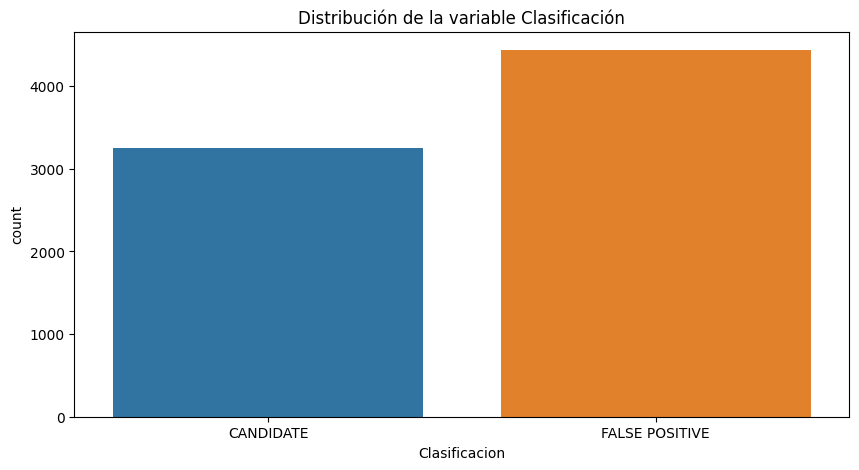

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Clasificacion', data=data)
plt.title('Distribución de la variable Clasificación')
plt.show()

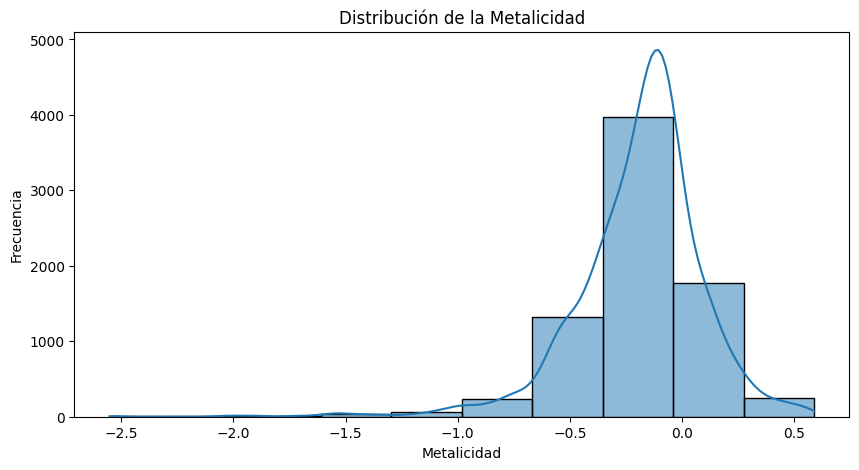

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Metalicidad'], kde=True, bins=10)
plt.title('Distribución de la Metalicidad')
plt.xlabel('Metalicidad')
plt.ylabel('Frecuencia')
plt.show()

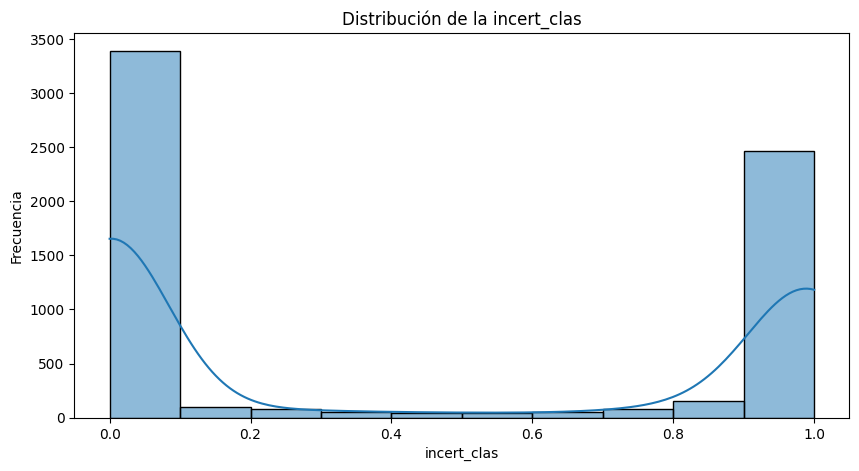

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data['incert_clas'], kde=True, bins=10)
plt.title('Distribución de la incert_clas')
plt.xlabel('incert_clas')
plt.ylabel('Frecuencia')
plt.show()

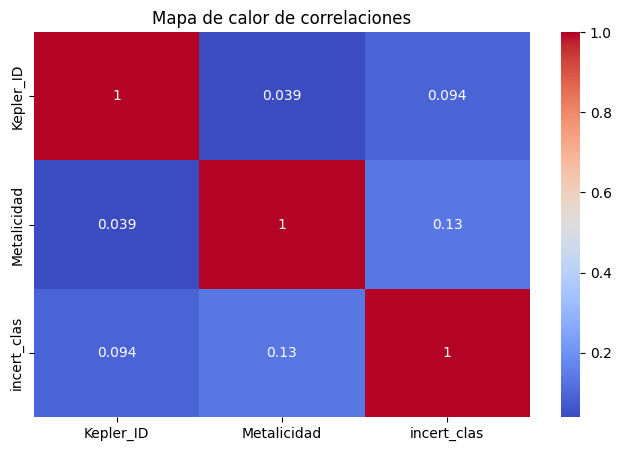

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

In [12]:
label_encoder = LabelEncoder()
data['Clasificacion'] = label_encoder.fit_transform(data['Clasificacion'])

In [19]:
X = data[['Kepler_ID', 'Metalicidad', 'incert_clas']]
Y = data['Clasificacion']

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.33, random_state=42)

smote_enn = SMOTEENN(random_state=42)
X_train_bal, Y_train_bal = smote_enn.fit_resample(X_train, y_train)

In [20]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train_bal, Y_train_bal)

RandomForestClassifier(n_estimators=10, random_state=42)

In [21]:
feature_importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

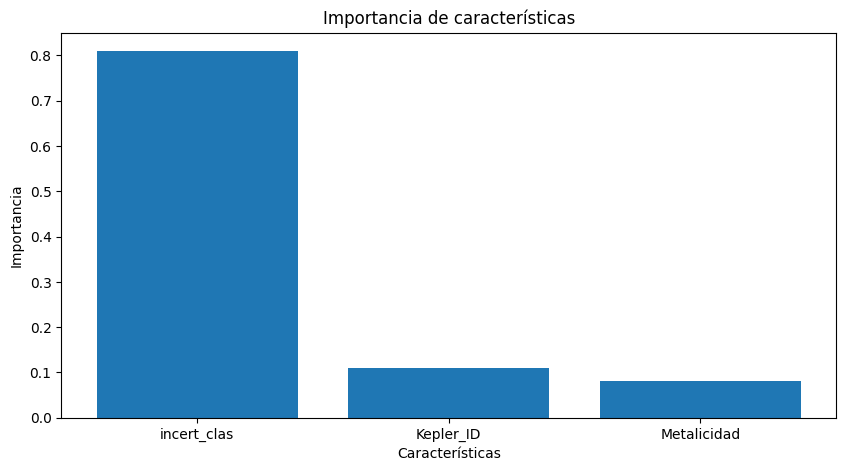

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices])
plt.title("Importancia de características")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

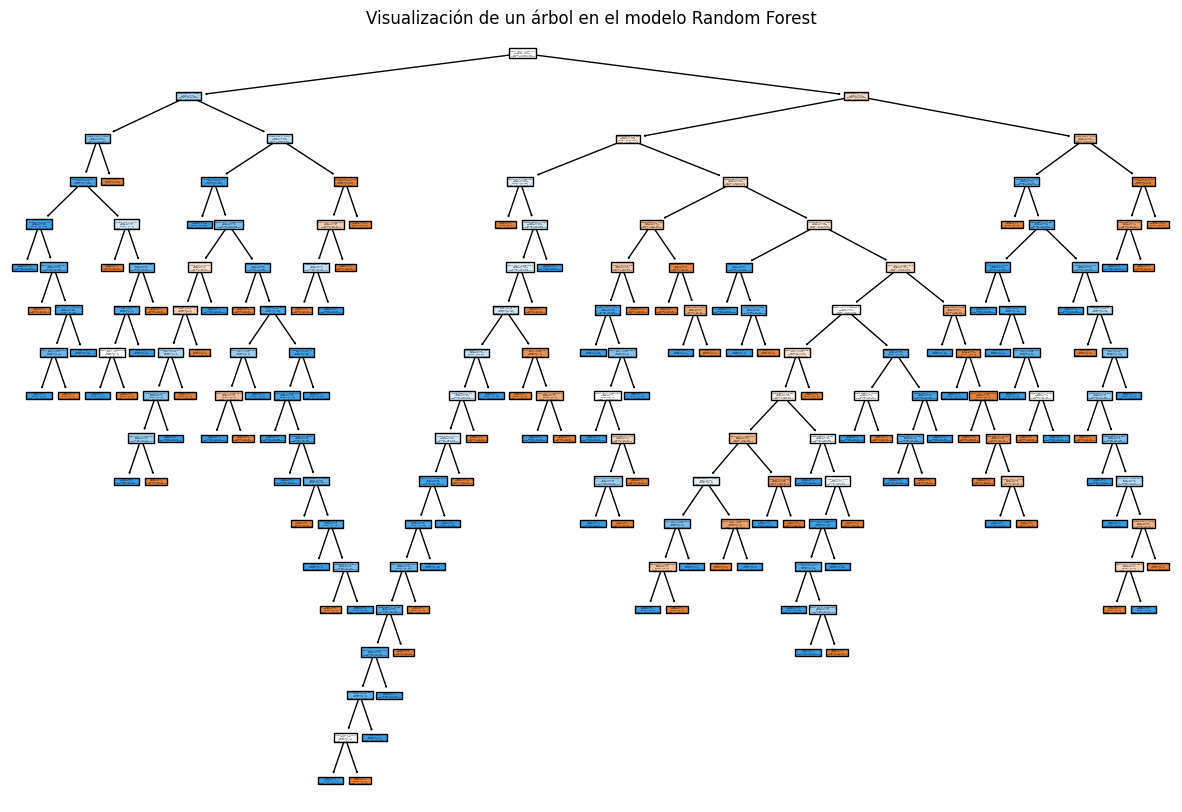

In [25]:
# Convertir class_names a una lista
class_names = list(label_encoder.classes_)

# Visualización de un árbol individual del bosque
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], feature_names=features, class_names=class_names, filled=True)
plt.title("Visualización de un árbol en el modelo Random Forest")
plt.show()

In [26]:
# Realizar predicciones y evaluar el modelo
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

     CANDIDATE       0.89      0.92      0.90      1059
FALSE POSITIVE       0.94      0.92      0.93      1477

      accuracy                           0.92      2536
     macro avg       0.91      0.92      0.91      2536
  weighted avg       0.92      0.92      0.92      2536

